<a href="https://colab.research.google.com/github/itdhirendra/IITRoorke_DS_AIML/blob/main/LSTM_on_FAKE_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import numpy as np
sequence=[1/(1+np.exp(-x)) for x in np.arange(-6,6,0.1)]

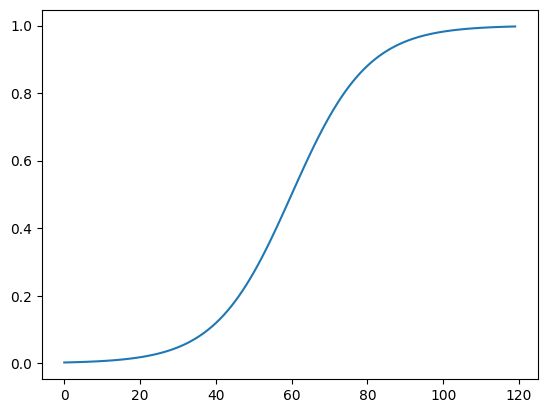

In [ ]:
plt.plot(sequence)

In [ ]:
n_steps=2
n_features=1

In [ ]:
sequence[0:2]

[0.0024726231566347743, 0.002731960763011059]

In [ ]:
sequence[2]

0.0030184163247084215

In [ ]:
sequence[:10]

[0.0024726231566347743,
 0.002731960763011059,
 0.0030184163247084215,
 0.0033348073074133413,
 0.003684239899435983,
 0.004070137715896121,
 0.00449627316094117,
 0.004966801650056948,
 0.00548629889945039,
 0.006059801491584095]

In [ ]:
# Split all the values tnto two seuence X,y
X=[]
y=[]

for i in range(len(sequence) -n_steps):
    X.append(sequence[i:i+n_steps])
    y.append(sequence[i+n_steps])

In [ ]:
#X,y any training data, essentially i can use any model

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
X.shape

(118, 2)

In [ ]:
y.shape

(118,)

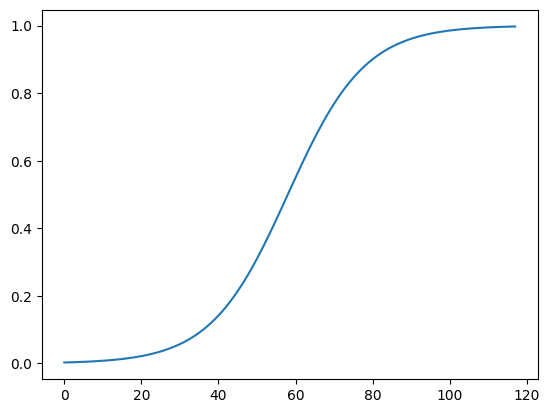

In [ ]:
plt.plot(y)

In [ ]:
# n_samples,timesteps,features
X= X.reshape(X.shape[0],X.shape[1],n_features)
X.shape

(118, 2, 1)

In [ ]:
X[0]

array([[0.00247262],
       [0.00273196]])

In [ ]:
y[0]

0.0030184163247084215

In [ ]:
from keras.layers import LSTM, Dense
from keras.models import Sequential

In [ ]:
model = Sequential()

# Hidden Layers
model.add(LSTM(2,activation='relu',return_sequences=True,input_shape=(n_steps,n_features)))
model.add(LSTM(4,activation='relu'))

#Output Layer
#Since i just want to predict only a single value
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 2, 2)                │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 4)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149 (596.00 B)

 Trainable params: 149 (596.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 2, 2)                │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 4)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149 (596.00 B)

 Trainable params: 149 (596.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X, y, epochs = 20, batch_size=2, validation_split=0.1 )

Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.3288 - val_loss: 0.9035
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3212 - val_loss: 0.8275
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2846 - val_loss: 0.7572
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2306 - val_loss: 0.6977
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2511 - val_loss: 0.6428
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1937 - val_loss: 0.5982
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1988 - val_loss: 0.5604
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2066 - val_loss: 0.5193
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1784 - val_loss: 0.4876
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1739 - val_loss: 0.4620
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1397 - val_loss: 0.4393
Epoch 12/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1562 - val_l

In [ ]:
predictions=model.predict(X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step


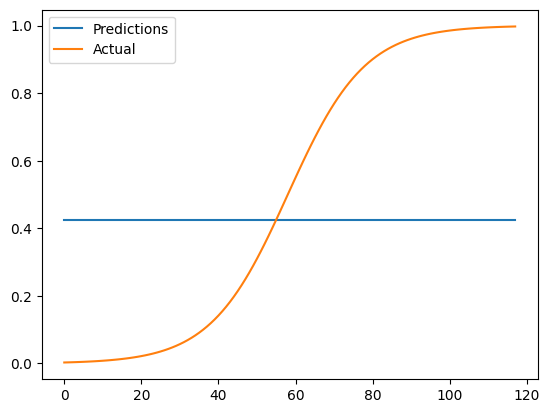

In [ ]:
plt.plot(predictions, label="Predictions")
plt.plot(y, label="Actual")
plt.legend()
plt.show()